In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [30]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] = iris.target
df.flower = df.flower.apply(lambda x: iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=30, gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777

In [5]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(kernel='linear', C=10, gamma='auto'), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [6]:
cross_val_score(SVC(kernel='rbf', C=10, gamma='auto'), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [7]:
cross_val_score(SVC(kernel='rbf', C=20, gamma='auto'), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [9]:
# each time cross_val_score() is called, it returns 5 numbers based on cv=5 (cv=cross-validation)
# each call of cross_val_scored() with different kernel and C results in a different set of 5 values
# since there's 2 different kernels to try and C is 1, 10 or 20, there's too many combinations to do it manually.
# let's do a for loop instead
import numpy as np

kernels = ['rbf', 'linear']
Cs = [1, 10, 20]
average = {}
for kernel in kernels:
    for C in Cs:
        score = cross_val_score(SVC(kernel=kernel, C=C, gamma='auto'), iris.data, iris.target, cv=5)
        average[kernel + '_' + str(C)] = np.average(score)

average

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [ ]:
# rbf_1=0.98, rbf_10=0.98 and linear_1=0.98 are the best scores

In [10]:
# GridSearchCV does the equivalence of the above block, so it can be written as follows
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(gamma='auto'), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=5, return_train_score=False)
grid.fit(iris.data, iris.target)
grid.cv_results_

{'mean_fit_time': array([0.00113225, 0.00079265, 0.00101442, 0.00058017, 0.00079637,
        0.00096416]),
 'std_fit_time': array([1.91641500e-04, 2.08851877e-04, 4.31499516e-04, 4.52612665e-05,
        2.40458885e-04, 2.67223602e-04]),
 'mean_score_time': array([0.00105095, 0.00046587, 0.00061197, 0.00043058, 0.00066028,
        0.00112519]),
 'std_score_time': array([4.10764118e-04, 1.23181261e-04, 1.05914045e-04, 7.49279461e-05,
        3.20686003e-04, 7.42371118e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [11]:
# convert the results into a dataframe
df = pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001132,0.000192,0.001051,0.000411,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000793,0.000209,0.000466,0.000123,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001014,0.000431,0.000612,0.000106,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000580,0.000045,0.000431,0.000075,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000796,0.000240,0.000660,0.000321,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000964,0.000267,0.001125,0.000742,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [12]:
# simply the dataframe further
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [ ]:
# rbf_1=0.98, rbf_10=0.98 and linear_1=0.98 are the best scores, just as shown in the block before GridSearchCV
# so using GridSearchCV, just supply a list into 'C' and 'kernel' to get as many scores as desired

In [13]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score

In [14]:
grid.best_score_

0.9800000000000001

In [15]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [16]:
# GridSearchCV tries all permutations of the lists C and kernel, which can be costly in computing.
# RandomizedSearchCV improves this by randomly selecting permutations instead
# here with n_iter=2, we only randomly select 2 permutations
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(SVC(gamma='auto'), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=5, return_train_score=False, n_iter=2)
random.fit(iris.data, iris.target)
pd.DataFrame(random.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,20,linear,0.966667


In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

params = {
    'Support Vector Machine': {'model':SVC(gamma='auto'), 'params':{'C':[1,10,20], 'kernel':['rbf', 'linear']}},
    'Random Forest': {'model':RandomForestClassifier(), 'params':{'n_estimators':[1,5,10]}},
    'Logistic Regression': {'model':LogisticRegression(solver='liblinear', multi_class='auto'), 'params':{'C':[1,5,10]}}
}

In [35]:
scores = []
for name, param in params.items():
    model = GridSearchCV(param['model'], param['params'], cv=5, return_train_score=False)
    model.fit(iris.data, iris.target)
    scores.append({'Model':name, 'Best Score':model.best_score_, 'Best Params':model.best_params_})

In [36]:
df = pd.DataFrame(scores, columns=['Model', 'Best Score', 'Best Params'])
df

,Model,Best Score,Best Params
0,Support Vector Machine,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,Random Forest,0.966667,{'n_estimators': 10}
2,Logistic Regression,0.966667,{'C': 5}


### Exercise: Machine Learning Finding Optimal Model and Hyperparameters

For digits dataset in sklearn.dataset, please try following classifiers and find out the one that gives best performance.
Also find the optimal parameters for that classifier.

from sklearn import svm  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import MultinomialNB  
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn.datasets import load_digits

digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [38]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

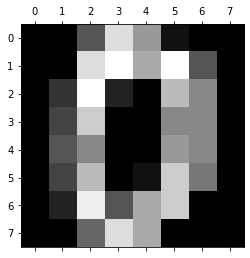

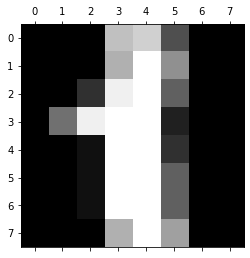

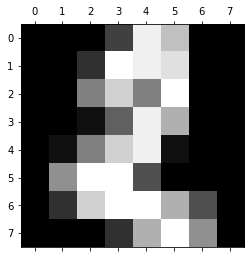

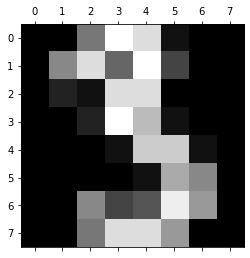

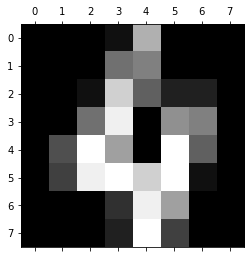

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [40]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [41]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
import pandas as pd

df = pd.DataFrame(digits.data)
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

params = {
    'Support Vector Machine': {'model':SVC(gamma='auto'), 'params':{'C':[1,10,20], 'kernel':['rbf', 'linear']}},
    'Random Forest': {'model':RandomForestClassifier(), 'params':{'n_estimators':[1,5,10]}},
    'Logistic Regression': {'model':LogisticRegression(solver='liblinear', multi_class='auto'), 'params':{'C':[1,5,10]}},
    'Decision Tree': {'model':DecisionTreeClassifier(), 'params':{'criterion': ['gini','entropy']}}, # criterion is from the Solution
    'Gaussian Naive Bayes': {'model':GaussianNB(), 'params':{}},
    'Multinomial Naive Bayes': {'model':MultinomialNB(), 'params':{}}
}

In [47]:
scores = []
for name, param in params.items():
    model = GridSearchCV(param['model'], param['params'], cv=5, return_train_score=False)
    model.fit(iris.data, iris.target)
    scores.append({'Model':name, 'Best Score':model.best_score_, 'Best Params':model.best_params_})
    
df = pd.DataFrame(scores, columns=['Model', 'Best Score', 'Best Params'])
df

,Model,Best Score,Best Params
0,Support Vector Machine,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,Random Forest,0.960000,{'n_estimators': 5}
2,Logistic Regression,0.966667,{'C': 5}
3,Decision Tree,0.966667,{'criterion': 'gini'}
4,Gaussian Naive Bayes,0.953333,{}
5,Multinomial Naive Bayes,0.953333,{}
